In [1]:
# Import libraries
import glob
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import datetime
from dateutil import parser
import seaborn as sns

In [2]:
# df = pd.read_csv("./MarineTraffic/AIS_2022_06_30.csv")
df = pd.read_csv("./MarineTraffic/ais_data.csv")
df.head()

,Unnamed: 0,mmsi,navigationalstatus,sog,cog,heading,shiptype,width,length,draught
0,0,219019621,Unknown value,0.0,86.0,86.0,Fishing,4.0,9.0,NaN
1,1,265628170,Unknown value,0.0,334.5,NaN,Port tender,8.0,27.0,NaN
2,2,219005719,Unknown value,0.0,208.7,NaN,Fishing,4.0,11.0,NaN
3,3,219028066,Unknown value,0.0,NaN,NaN,Pleasure,3.0,12.0,NaN
4,4,212584000,Moored,0.0,153.0,106.0,Cargo,13.0,99.0,6.3


In [3]:
# df = df.drop([ "MMSI", "BaseDateTime", "LAT", "LON", "VesselName", "Heading", "IMO", "CallSign", "Status", "Draft", "TransceiverClass"], axis=1)
df = df.drop(["navigationalstatus"], axis=1)
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df.dropna(inplace=True)

In [5]:
# df = df[df['SOG'] > 0.0]
df = df[df['sog'] > 0.0]

In [6]:
df.shape

(324607, 8)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["shiptype"] = le.fit_transform(df["shiptype"])

In [8]:
df.head(23)

,mmsi,sog,cog,heading,shiptype,width,length,draught
5,636020662,0.1,43.9,286.0,0,23.0,149.0,6.3
42,311379000,13.4,34.1,34.0,0,29.0,190.0,9.9
53,244750397,12.6,137.4,137.0,0,14.0,89.0,3.7
58,219003406,0.1,150.9,241.0,16,4.0,15.0,2.5
70,314303000,8.6,333.1,336.0,0,14.0,98.0,3.9
86,257840000,11.8,337.4,339.0,13,23.0,144.0,7.7
87,212111000,12.7,210.1,212.0,13,30.0,176.0,9.4
91,311379000,13.4,32.0,33.0,0,29.0,190.0,9.9
95,257840000,11.9,337.8,337.0,13,23.0,144.0,7.7
97,219018833,0.1,163.9,34.0,1,8.0,30.0,3.5


In [9]:
# y = df["SOG"]
# x = df.drop([ "SOG"], axis = 1)
y = df["sog"]
x = df.drop([ "sog"], axis = 1)

In [10]:
x.corr(method ='pearson')

,mmsi,cog,heading,shiptype,width,length,draught
mmsi,1.000000,-0.028213,-0.030239,0.111552,0.441892,0.442567,0.417929
cog,-0.028213,1.000000,0.967973,-0.017397,-0.052353,-0.043560,-0.009159
heading,-0.030239,0.967973,1.000000,-0.018095,-0.055270,-0.046808,-0.014733
shiptype,0.111552,-0.017397,-0.018095,1.000000,0.183349,0.081851,0.147324
width,0.441892,-0.052353,-0.055270,0.183349,1.000000,0.952945,0.737855
length,0.442567,-0.043560,-0.046808,0.081851,0.952945,1.000000,0.734782
draught,0.417929,-0.009159,-0.014733,0.147324,0.737855,0.734782,1.000000


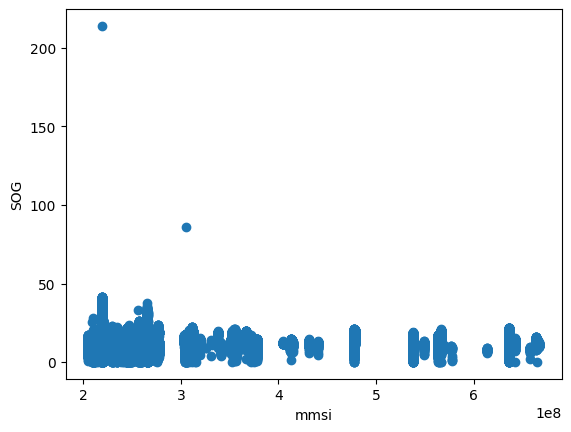

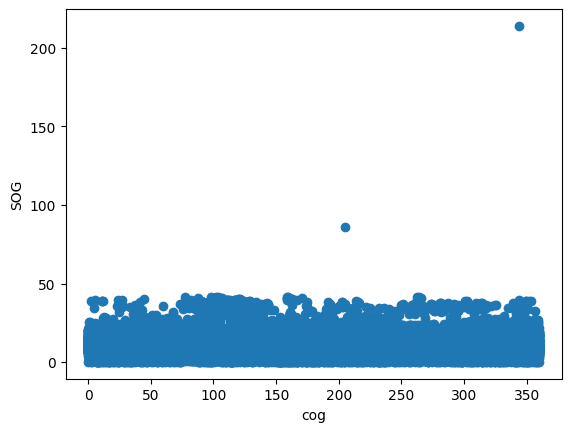

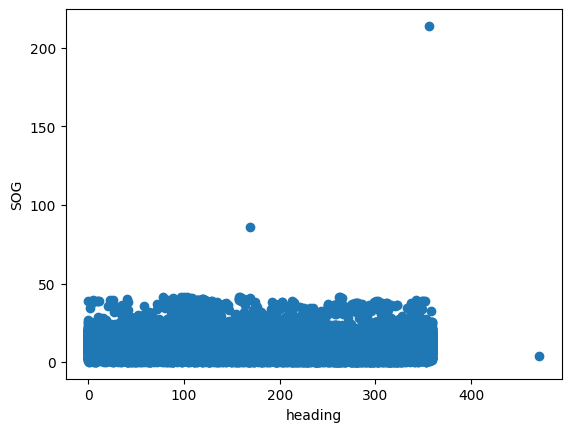

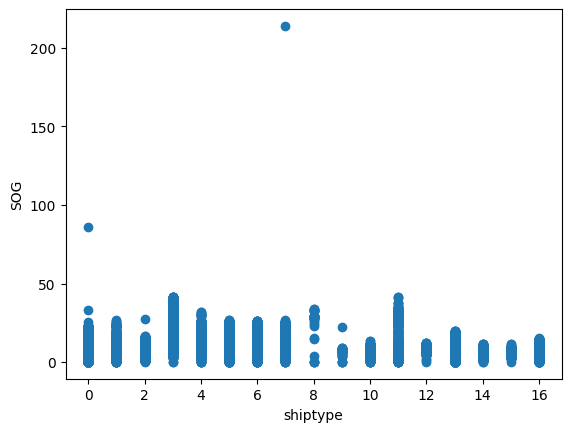

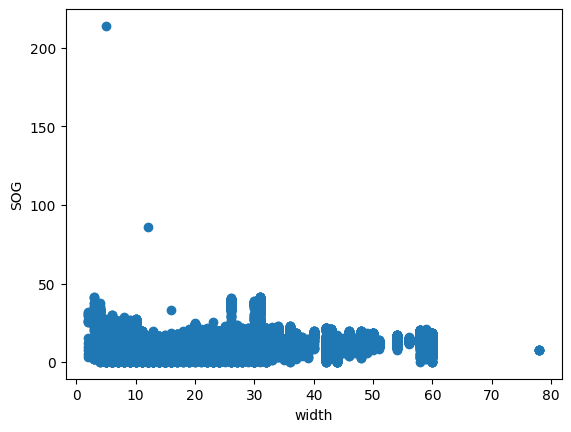

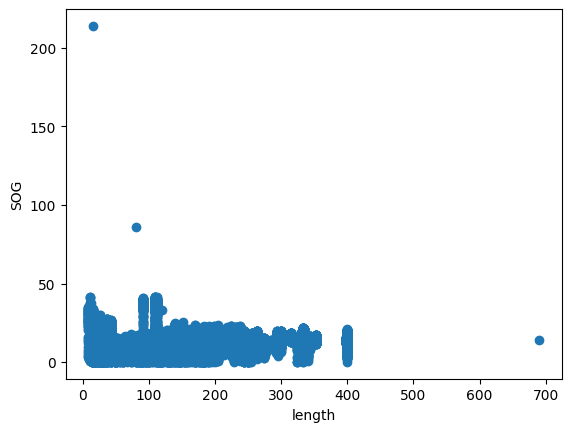

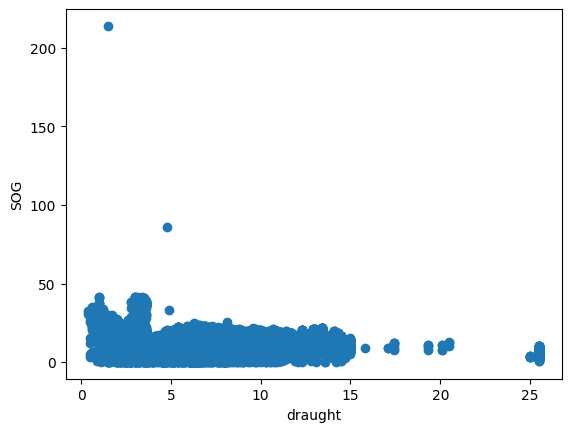

In [11]:
for col in x.columns:
    tempX = x[col]
    plt.scatter(tempX, y)
    plt.xlabel(col)
    plt.ylabel("SOG")
    plt.show()

Text(0.5, 1.0, 'Correlation')

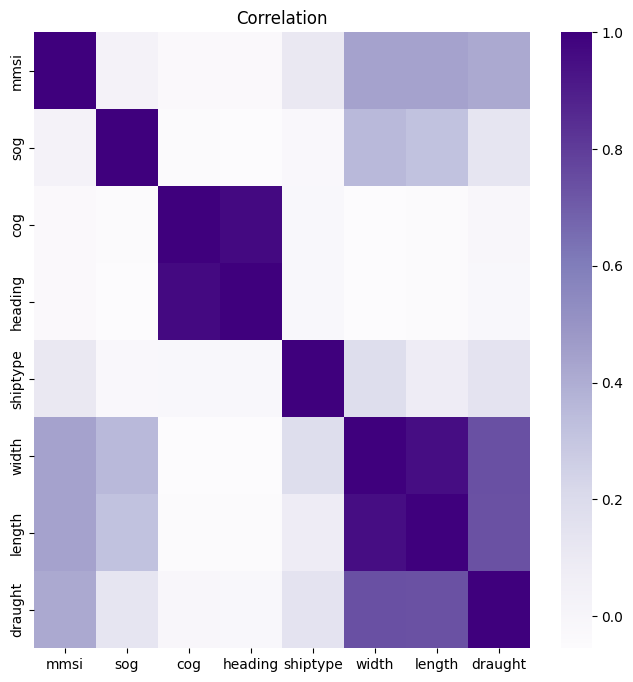

In [12]:
# using heatmap to find correlation
plt.figure(figsize=(8,8))
heatmap = sns.heatmap(df.corr(method ='pearson'), cmap="Purples")
heatmap.set_title("Correlation")

In [13]:
# getting the highest related attributes to the 'SOG' column
# df.corr(method ='pearson').sort_values(["SOG"], ascending=False)[["SOG"]]
df.corr(method ='pearson').sort_values(["sog"], ascending=False)[["sog"]]

,sog
sog,1.000000
width,0.354224
length,0.317156
draught,0.132650
mmsi,0.030007
shiptype,-0.020036
cog,-0.046013
heading,-0.051744


Selected attributes that relate to our problem in question =>  `wdir` | `Tper` | `sper` | `Tdir` | `sdir` | `Length` | `Width`

In [20]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error


poly_model = PolynomialFeatures(degree=7)
poly_x_values = poly_model.fit_transform(x.values)

In [15]:
# # check our accuracy for each degree, the lower the error the better!
# number_degrees = [1,2,3,4,5,6,7]
# plt_mean_squared_error = []
# for degree in number_degrees:

#    poly_model = PolynomialFeatures(degree=degree)
  
#    poly_x_values = poly_model.fit_transform(x.values)
#    # poly_model.fit(poly_x_values, Y.values)
  
#    regression_model = LinearRegression()
#    regression_model.fit(poly_x_values, y.values)
#    y_pred = regression_model.predict(poly_x_values)
  
#    plt_mean_squared_error.append(mean_squared_error(y.values, y_pred, squared=False))
  
# plt.scatter(number_degrees,plt_mean_squared_error, color="green")
# plt.plot(number_degrees,plt_mean_squared_error, color="red") 

In [21]:
# cross validation technique being applied => test-train split
poly_x_train, poly_x_test, y_train, y_test = train_test_split(poly_x_values, y.values, test_size = 0.3, random_state = 4)

In [22]:
# we use linear regression as a base
regression_model = LinearRegression()
model = regression_model.fit(poly_x_values, y.values)
model.score(poly_x_test, y_test)

MemoryError: Unable to allocate 8.30 GiB for an array with shape (324607, 3432) and data type float64

In [ ]:
temp = np.array([
    211.3,
    31,
    46.0,
    12.0,
    57.0
]).reshape(1, -1)
predict_ = poly_model.fit_transform(temp)
predict_[0].shape
# predict_ = np.delete(predict_,(1),axis=1)

regression_model.predict(predict_)

ValueError: X has 126 features, but LinearRegression is expecting 330 features as input.

In [ ]:
# cross validation technique being applied => test-train split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

# training multiple linear regression
reg = LinearRegression()
reg.fit(x_train, y_train)

# testing our MLR
y_pred = reg.predict(x_test)

reg.score(x_train, y_train)

0.18713851822291927